### Implementing random forest regression

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

X_feature_names = ['age', 'gender', 'body mass index', 'average blood pressure','bl_0','bl_1','bl_2','bl_3','bl_4','bl_5']

#bin target variable for better sampling
bins = 50*np.arange(8)
binned_y = np.digitize(y, bins)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=binned_y)

In [2]:
from sklearn.ensemble import RandomForestRegressor

rft = RandomForestRegressor()
rft.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [3]:
y_pred = rft.predict(X_test)

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

47.41123595505617

In [4]:
(np.abs(y_test - y_pred)/(y_test)).mean()

0.44951548485840126

In [8]:
rft.estimators_

[DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1629758839, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=890111649, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=593651610, splitter='best'),
 DecisionTreeRegresso

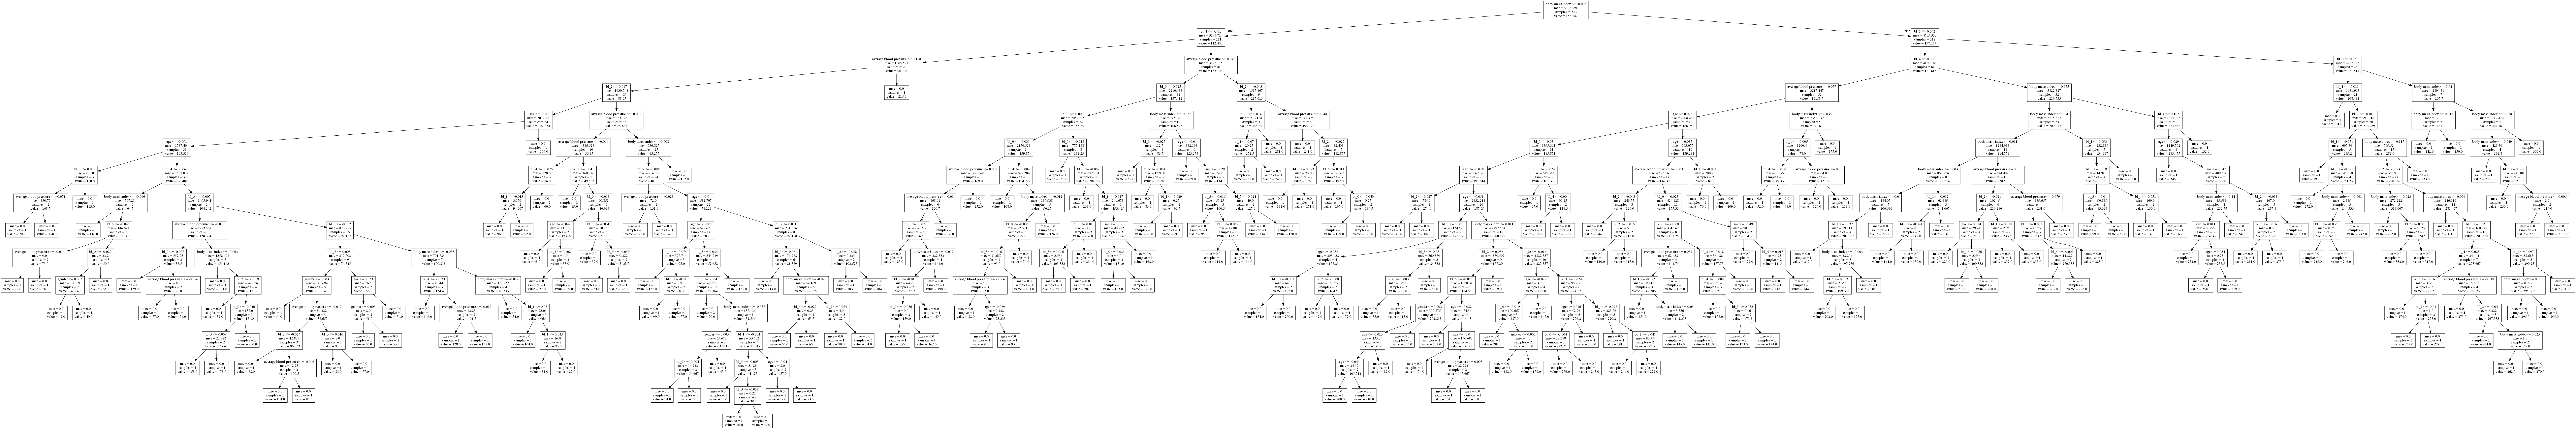

In [6]:
import numpy as np
from sklearn import tree
from sklearn.externals.six import StringIO

import pydot
from IPython.display import Image

dot_diabetes = StringIO()
tree.export_graphviz(rft.estimators_[0], out_file = dot_diabetes, feature_names = X_feature_names)
graph = pydot.graph_from_dot_data(dot_diabetes.getvalue())
Image(graph.create_png())

In [10]:
rft.feature_importances_

array([0.06836913, 0.01049981, 0.27061134, 0.10736103, 0.04779256,
       0.04393719, 0.05243581, 0.02815993, 0.29437677, 0.07645643])

[Text(0,0,'age'),
 Text(0,0,'gender'),
 Text(0,0,'body mass index'),
 Text(0,0,'average blood pressure'),
 Text(0,0,'bl_0'),
 Text(0,0,'bl_1'),
 Text(0,0,'bl_2'),
 Text(0,0,'bl_3'),
 Text(0,0,'bl_4'),
 Text(0,0,'bl_5')]

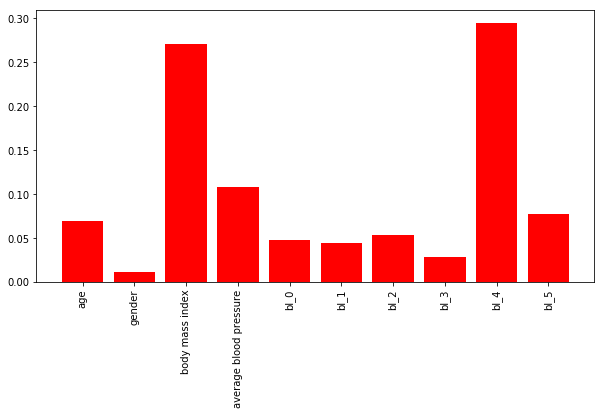

In [11]:
fig, ax = plt.subplots(figsize=(10,5))

bar_rects = ax.bar(np.arange(10), rft.feature_importances_,color='r',align='center')
ax.xaxis.set_ticks(np.arange(10))
ax.set_xticklabels(X_feature_names, rotation='vertical')

### Bagging regression with nearest neighbors

In [12]:
import numpy as np
import pandas as pd


from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

X_feature_names = ['age', 'gender', 'body mass index', 'average blood pressure','bl_0','bl_1','bl_2','bl_3','bl_4','bl_5']

#bin target variable for better sampling
bins = 50*np.arange(8)
binned_y = np.digitize(y, bins)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=binned_y)

In [13]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV

single_estimator = KNeighborsRegressor()
ensemble_estimator = BaggingRegressor(base_estimator = single_estimator)

param_dist = {
 'max_samples': [0.5,1.0],
 'max_features' : [0.5,1.0],
 'oob_score' : [True, False],
 'base_estimator__n_neighbors': [3,5],
 'n_estimators': [100]
 }

pre_gs_inst_bag = RandomizedSearchCV(ensemble_estimator,
 param_distributions = param_dist,
 cv=3,
 n_iter = 5,
 n_jobs=-1)

pre_gs_inst_bag.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score='raise',
          estimator=BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=5, n_jobs=-1,
          param_distributions={'max_samples': [0.5, 1.0], 'max_features': [0.5, 1.0], 'oob_score': [True, False], 'base_estimator__n_neighbors': [3, 5], 'n_estimators': [100]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [14]:
pre_gs_inst_bag.best_params_

{'base_estimator__n_neighbors': 5,
 'max_features': 0.5,
 'max_samples': 1.0,
 'n_estimators': 100,
 'oob_score': False}

In [15]:
rs_bag = BaggingRegressor(**{'max_features': 1.0,
 'max_samples': 0.5,
 'n_estimators': 1000,
 'oob_score': True,
 'base_estimator': KNeighborsRegressor(n_neighbors=5)})
rs_bag.fit(X_train, y_train)

BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.5, n_estimators=1000, n_jobs=1, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [16]:
y_pred = rs_bag.predict(X_test)

from sklearn.metrics import r2_score, mean_absolute_error

print("R-squared",r2_score(y_test, y_pred))
print("MAE : ",mean_absolute_error(y_test, y_pred))
print("MAPE : ",(np.abs(y_test - y_pred)/y_test).mean())

R-squared 0.520661717017542
MAE :  43.14770786516855
MAPE :  0.4056120870356933


### Tuning gradient boosting trees and AdaBoost regressor 

In [1]:
#Load this line within an IPython notebook to visualize within the notebook
%matplotlib inline 

from __future__ import division #Load within Python 2.7 for regular division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
cali_housing = fetch_california_housing()

X = cali_housing.data
y = cali_housing.target

#bin output variable to split training and testing sets into two similar sets
bins = np.arange(6)
binned_y = np.digitize(y, bins)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=binned_y)

In [2]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'max_features' : ['log2',1.0],
 'max_depth' : [3, 5, 7, 10],
 'min_samples_leaf' : [2, 3, 5, 10],
 'n_estimators': [50, 100],
 'learning_rate' : [0.0001,0.001,0.01,0.05,0.1,0.3],
 'loss' : ['ls','huber']
 }

pre_gs_inst = RandomizedSearchCV(GradientBoostingRegressor(warm_start=True),
 param_distributions = param_dist,
 cv=3,
 n_iter = 30, n_jobs=-1)
pre_gs_inst.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score='raise',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=True),
          fit_params=None, iid=True, n_iter=30, n_jobs=-1,
          param_distributions={'max_features': ['log2', 1.0], 'max_depth': [3, 5, 7, 10], 'min_samples_leaf': [2, 3, 5, 10], 'n_estimators': [50, 100], 'learning_rate': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.3], 'loss': ['ls', 'huber']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [3]:
def get_grid_df(fitted_gs_estimator):
    res_dict = fitted_gs_estimator.cv_results_
 
    results_df = pd.DataFrame()
    for key in res_dict.keys():
         results_df[key] = res_dict[key]
 
    return results_df

def group_report(results_df):
    param_cols = [x for x in results_df.columns if 'param' in x and x is not 'params']
    focus_cols = param_cols + ['mean_test_score']
 
    print("Grid CV Report \n")
 
    output_df = pd.DataFrame(columns = ['param_type','param_set', 'mean_score','mean_std'])
    cc = 0
    for param in param_cols:
        for key,group in results_df.groupby(param):
            output_df.loc[cc] = (param, key, group['mean_test_score'].mean(), group['mean_test_score'].std())
            cc += 1
    return output_df

results_df = get_grid_df(pre_gs_inst)
group_report(results_df)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

Grid CV Report 



,param_type,param_set,mean_score,mean_std
0,param_n_estimators,50,0.628254,0.288894
1,param_n_estimators,100,0.668216,0.270987
2,param_min_samples_leaf,2,0.612980,0.292115
3,param_min_samples_leaf,3,0.666373,0.295075
4,param_min_samples_leaf,5,0.619873,0.326798
5,param_min_samples_leaf,10,0.717714,0.187484
6,param_max_features,1,0.548700,0.309676
7,param_max_features,log2,0.759135,0.185914
8,param_max_depth,3,0.578859,0.300522
9,param_max_depth,5,0.802665,0.031764


In [4]:
param_dist = {'max_features' : ['sqrt',0.5,1.0],
 'max_depth' : [2,3,4],
 'min_samples_leaf' : [3, 4],
 'n_estimators': [50, 100],
 'learning_rate' : [0.2,0.25, 0.3, 0.4],
 'loss' : ['ls','huber']
 }
pre_gs_inst = RandomizedSearchCV(GradientBoostingRegressor(warm_start=True),
param_distributions = param_dist,cv=3,n_iter = 30, n_jobs=-1)
pre_gs_inst.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score='raise',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=True),
          fit_params=None, iid=True, n_iter=30, n_jobs=-1,
          param_distributions={'max_features': ['sqrt', 0.5, 1.0], 'max_depth': [2, 3, 4], 'min_samples_leaf': [3, 4], 'n_estimators': [50, 100], 'learning_rate': [0.2, 0.25, 0.3, 0.4], 'loss': ['ls', 'huber']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [5]:
results_df = get_grid_df(pre_gs_inst)
group_report(results_df)

Grid CV Report 



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

,param_type,param_set,mean_score,mean_std
0,param_n_estimators,50,0.776857,0.022061
1,param_n_estimators,100,0.790335,0.017857
2,param_min_samples_leaf,3,0.784300,0.019642
3,param_min_samples_leaf,4,0.779565,0.023718
4,param_max_features,0.5,0.778956,0.021308
5,param_max_features,1,0.796115,0.019768
6,param_max_features,sqrt,0.774678,0.018405
7,param_max_depth,2,0.768297,0.017614
8,param_max_depth,3,0.790116,0.013764
9,param_max_depth,4,0.800255,0.014094


In [6]:
param_dist = {'max_features' : [0.4, 0.5, 0.6],
 'max_depth' : [5,6],
 'min_samples_leaf' : [4,5],
 'n_estimators': [300],
 'learning_rate' : [0.3],
 'loss' : ['ls','huber']
 }
rs_gbt = GradientBoostingRegressor(warm_start=True,
 max_features = 0.5,
 min_samples_leaf = 4,
 learning_rate=0.3,
 max_depth = 6,
 n_estimators = 4000,loss = 'huber')

rs_gbt.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.3, loss='huber', max_depth=6,
             max_features=0.5, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=4, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=4000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=True)

In [7]:
y_pred = rs_gbt.predict(X_test)

from sklearn.metrics import r2_score, mean_absolute_error

print("R-squared",r2_score(y_test, y_pred))
print("MAE : ",mean_absolute_error(y_test, y_pred))
print("MAPE : ",(np.abs(y_test - y_pred)/y_test).mean())

R-squared 0.83330570431982
MAE :  0.31265023202658515
MAPE :  0.17279836704465534


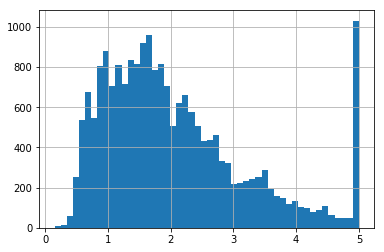

In [8]:
pd.Series(y).hist(bins=50)

In [9]:
bins = np.arange(6)
binned_y = np.digitize(y, bins)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=binned_y)

In [10]:
y_binary = np.where(y >= 5, 1,0)

train_shape = X_train.shape[0]

y_train_binned = y_binary[:train_shape]
y_test_binned = y_binary[train_shape:]

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
param_dist = {'max_features' : ['log2',0.5,1.0],
              'max_depth' : [2,3,6],
              'min_samples_leaf' : [1,2,3,10],
              'n_estimators': [100],
              'learning_rate' : [0.1,0.2,0.3,1],
              'loss' : ['deviance']
             }
pre_gs_inst = RandomizedSearchCV(GradientBoostingClassifier(warm_start=True),
                                 param_distributions = param_dist,
                                 cv=3,
                                 n_iter = 10, n_jobs=-1)
pre_gs_inst.fit(X_train, y_train_binned)

RandomizedSearchCV(cv=3, error_score='raise',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=True),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'max_features': ['log2', 0.5, 1.0], 'max_depth': [2, 3, 6], 'min_samples_leaf': [1, 2, 3, 10], 'n_estimators': [100], 'learning_rate': [0.1, 0.2, 0.3, 1], 'loss': ['deviance']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [12]:
pre_gs_inst.best_params_

{'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': 'log2',
 'min_samples_leaf': 10,
 'n_estimators': 100}

In [13]:
gbc = GradientBoostingClassifier(**{'learning_rate': 0.2,
 'loss': 'deviance',
 'max_depth': 2,
 'max_features': 1.0,
 'min_samples_leaf': 2,
 'n_estimators': 1000, 'warm_start':True}).fit(X_train, y_train_binned)

In [14]:
y_pred = gbc.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test_binned, y_pred)

0.9358042635658915

In [15]:
#Load this line within an IPython notebook to visualize within the notebook
%matplotlib inline 

from __future__ import division #Load within Python 2.7 for regular division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing

cali_housing = fetch_california_housing()

X = cali_housing.data
y = cali_housing.target

#bin output variable to split training and testing sets into two similar sets
bins = np.arange(6)
binned_y = np.digitize(y, bins)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=binned_y)

In [16]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }

pre_gs_inst = RandomizedSearchCV(AdaBoostRegressor(),param_distributions = param_dist,
 cv=3,
 n_iter = 10,
 n_jobs=-1)

pre_gs_inst.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score='raise',
          estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [50, 100], 'learning_rate': [0.01, 0.05, 0.1, 0.3, 1], 'loss': ['linear', 'square', 'exponential']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [17]:
pre_gs_inst.best_params_

{'learning_rate': 0.05, 'loss': 'linear', 'n_estimators': 50}

In [18]:
param_dist = {
 'n_estimators': [100],
 'learning_rate' : [0.04,0.045,0.05,0.055,0.06],
 'loss' : ['linear']
 }

import copy
ada_best = copy.deepcopy(pre_gs_inst.best_params_)
ada_best['n_estimators'] = 3000

rs_ada = AdaBoostRegressor(**ada_best)
rs_ada.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=0.05, loss='linear',
         n_estimators=3000, random_state=None)

In [19]:
y_pred = rs_ada.predict(X_test)

from sklearn.metrics import r2_score, mean_absolute_error

print("R-squared",r2_score(y_test, y_pred))
print("MAE : ",mean_absolute_error(y_test, y_pred))
print("MAPE : ",(np.abs(y_test - y_pred)/y_test).mean())

R-squared 0.5323306452410411
MAE :  0.6588187766975969
MAPE :  0.49054243788192786


### Defining a stacking aggregator with scikit-learn

In [20]:
from __future__ import division

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing

cali_housing = fetch_california_housing()

X = cali_housing.data
y = cali_housing.target

bins = np.arange(6)


from sklearn.model_selection import train_test_split

binned_y = np.digitize(y, bins)

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

X_train_prin, X_test_prin, y_train_prin, y_test_prin = train_test_split(X, y,test_size=0.2,stratify=binned_y)
binned_y_train_prin = np.digitize(y_train_prin, bins)
X_1, X_stack, y_1, y_stack = train_test_split(X_train_prin, y_train_prin,test_size=0.33,stratify=binned_y_train_prin )

In [21]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import RandomizedSearchCV

param_dist = {
 'max_samples': [0.5,1.0],
 'max_features' : [0.5,1.0],
 'oob_score' : [True, False],
 'base_estimator__n_neighbors': [3,5],
 'n_estimators': [100]
 }

single_estimator = KNeighborsRegressor()
ensemble_estimator = BaggingRegressor(base_estimator = single_estimator)

pre_gs_inst_bag = RandomizedSearchCV(ensemble_estimator,
 param_distributions = param_dist,
 cv=3,
 n_iter = 5,
 n_jobs=-1)

pre_gs_inst_bag.fit(X_1, y_1)

RandomizedSearchCV(cv=3, error_score='raise',
          estimator=BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=5, n_jobs=-1,
          param_distributions={'max_samples': [0.5, 1.0], 'max_features': [0.5, 1.0], 'oob_score': [True, False], 'base_estimator__n_neighbors': [3, 5], 'n_estimators': [100]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [22]:
rs_bag = BaggingRegressor(**{'max_features': 0.5,
 'max_samples': 0.5,
 'n_estimators': 3000,
 'oob_score': False, 
 'base_estimator': KNeighborsRegressor(n_neighbors=3)})

rs_bag.fit(X_1, y_1)

BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=0.5, n_estimators=3000, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [23]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'max_features' : ['log2',0.4,0.5,0.6,1.0],
 'max_depth' : [2,3, 4, 5,6, 7, 10],
 'min_samples_leaf' : [1,2, 3, 4, 5, 10],
 'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.25,0.275,0.3,0.325],
 'loss' : ['ls','huber']
 }
pre_gs_inst = RandomizedSearchCV(GradientBoostingRegressor(warm_start=True),param_distributions = param_dist,
 cv=3,
 n_iter = 30, n_jobs=-1)
pre_gs_inst.fit(X_1, y_1)

RandomizedSearchCV(cv=3, error_score='raise',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=True),
          fit_params=None, iid=True, n_iter=30, n_jobs=-1,
          param_distributions={'max_features': ['log2', 0.4, 0.5, 0.6, 1.0], 'max_depth': [2, 3, 4, 5, 6, 7, 10], 'min_samples_leaf': [1, 2, 3, 4, 5, 10], 'n_estimators': [50, 100], 'learning_rate': [0.01, 0.05, 0.1, 0.25, 0.275, 0.3, 0.325], 'loss': ['ls', 'huber']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [24]:
gbt_inst = GradientBoostingRegressor(**{'learning_rate': 0.05,
 'loss': 'huber',
 'max_depth': 10,
 'max_features': 0.4,
 'min_samples_leaf': 5,
 'n_estimators': 3000,
 'warm_start': True}).fit(X_1, y_1)

In [25]:
y_pred_bag = rs_bag.predict(X_stack)
y_pred_gbt = gbt_inst.predict(X_stack)

In [26]:
from sklearn.metrics import r2_score, mean_absolute_error

print("R-squared",r2_score(y_stack, y_pred_bag))
print("MAE : ",mean_absolute_error(y_stack, y_pred_bag))
print("MAPE : ",(np.abs(y_stack- y_pred_bag)/y_stack).mean())

R-squared 0.5418870942079839
MAE :  0.5966334679894384
MAPE :  0.3867254261718817


In [27]:
from sklearn.metrics import r2_score, mean_absolute_error

print("R-squared",r2_score(y_stack, y_pred_gbt))
print("MAE : ",mean_absolute_error(y_stack, y_pred_gbt))
print("MAPE : ",(np.abs(y_stack- y_pred_gbt)/y_stack).mean())

R-squared 0.8324124464677088
MAE :  0.301071787185644
MAPE :  0.16387176228320116


In [28]:
y_pred_bag = pre_gs_inst_bag.predict(X_stack)
y_pred_gbt = gbt_inst.predict(X_stack)

preds_df = pd.DataFrame(columns = ['bag', 'gbt'])

preds_df['bag'] = y_pred_bag
preds_df['gbt'] = y_pred_gbt


preds_df

,bag,gbt
0,1.817392,1.556476
1,1.342354,0.646254
2,1.902712,1.556450
3,2.061198,2.556635
4,2.571050,2.819055
5,2.278503,1.523640
6,1.830100,1.919904
7,1.735532,1.617679
8,2.928703,3.751861
9,2.277280,3.207261


In [29]:
preds_df.corr()

,bag,gbt
bag,1.000000,0.900671
gbt,0.900671,1.000000


In [30]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'max_features' : ['sqrt','log2',1.0],
 'min_samples_leaf' : [1, 2, 3, 7, 11],
 'n_estimators': [50, 100],
 'oob_score': [True, False]}

pre_gs_inst = RandomizedSearchCV(ExtraTreesRegressor(warm_start=True,bootstrap=True),
 param_distributions = param_dist,
 cv=3,
 n_iter = 15)

pre_gs_inst.fit(preds_df.values, y_stack)

RandomizedSearchCV(cv=3, error_score='raise',
          estimator=ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=True),
          fit_params=None, iid=True, n_iter=15, n_jobs=1,
          param_distributions={'max_features': ['sqrt', 'log2', 1.0], 'min_samples_leaf': [1, 2, 3, 7, 11], 'n_estimators': [50, 100], 'oob_score': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [31]:
import copy
 
param_dict = copy.deepcopy(pre_gs_inst.best_params_)
 
param_dict['n_estimators'] = 2000
param_dict['warm_start'] = True
param_dict['bootstrap'] = True
param_dict['n_jobs'] = -1
 
param_dict

{'bootstrap': True,
 'max_features': 1.0,
 'min_samples_leaf': 11,
 'n_estimators': 2000,
 'n_jobs': -1,
 'oob_score': True,
 'warm_start': True}

In [32]:
final_etr = ExtraTreesRegressor(**param_dict)
final_etr.fit(preds_df.values, y_stack)

ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
          max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0,
          min_impurity_split=None, min_samples_leaf=11,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=2000, n_jobs=-1, oob_score=True, random_state=None,
          verbose=0, warm_start=True)

In [33]:
def handle_X_set(X_train_set):
    y_pred_bag = rs_bag.predict(X_train_set)
    y_pred_gbt = gbt_inst.predict(X_train_set)
    preds_df = pd.DataFrame(columns = ['bag', 'gbt'])

    preds_df['bag'] = y_pred_bag
    preds_df['gbt'] = y_pred_gbt
 
    return preds_df.values

def predict_from_X_set(X_train_set):
    return final_etr.predict(handle_X_set(X_train_set)) 

y_pred = predict_from_X_set(X_test_prin)

In [34]:
# It is possible to increase score by including the data columns alongside the stacker predictions
from sklearn.metrics import r2_score, mean_absolute_error

print("R-squared",r2_score(y_test_prin, y_pred))
print("MAE : ",mean_absolute_error(y_test_prin, y_pred))
print("MAPE : ",(np.abs(y_test_prin- y_pred)/y_test_prin).mean())

R-squared 0.8414035134781026
MAE :  0.3073720485716228
MAPE :  0.17366348688601302
